# Energy Consumption Forecasting with CUDA and Machine Learning
## Selected Topics in Machine Learning

**Objective**: Predict household energy consumption using CUDA-accelerated computations and advanced machine learning techniques including semi-supervised learning.

## Project Structure
1. **Setup & Data Loading**
2. **Exploratory Data Analysis (EDA)**
3. **Data Preprocessing** 
4. **CUDA Activation** 
5. **Feature Engineering with CUDA** 
6. **CUDA based solution**
7. **Semi-Supervised Learning (Label Spreading)**
8. **Traditional ML Models**
9. **Conclusion**

### Dataset : UCI Individual Household Electric Power Consumption\n",
- **Source**: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption\n",
- **Format**: TXT file with semicolon separator\n",
- **Features**: Date, Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering (1, 2, 3)\n",
- **Records**: ~2 million measurements (minute-level data from 2006-2010)\n",
- **Target**: Global_active_power (household energy consumption in kW)"

## 1. Setup & Data Loading

Import necessary libraries and load the dataset.

**Cell Purpose:** Library import and environment configuration.
This cell loads essential Python libraries for data manipulation (NumPy, Pandas), visualization (Matplotlib, Seaborn), and time handling. It configures the plotting style to use Seaborn's dark grid theme with a husl color palette for aesthetically pleasing visualizations. Display settings are adjusted to show all DataFrame columns without truncation. The cell verifies successful import by printing library versions. This establishes the foundational toolkit for the entire analysis pipeline.

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✓ Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

✓ Libraries imported successfully!
NumPy version: 1.24.3
Pandas version: 2.0.3


**Cell Purpose:** Load raw household power consumption dataset from text file.
This cell reads the UCI Machine Learning Repository's household power consumption dataset using Pandas' CSV reader with semicolon delimiter. The dataset contains minute-level measurements of electrical quantities from a single household over 4 years. The `low_memory=False` parameter ensures consistent data type inference across all rows. After loading, it displays the first few rows to verify structure. This is the initial data ingestion step before any cleaning or transformation.

In [2]:
# Load the dataset
data_path = 'household_power_consumption.txt'

print("Loading dataset...")
df = pd.read_csv(data_path, sep=';', low_memory=False)
df.head()

Loading dataset...


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## 2. Data Exploration & Visualization

Let's understand our dataset and visualize the patterns in energy consumption.

**Cell Purpose:** Display DataFrame metadata including column types and memory usage.
This cell invokes Pandas' `.info()` method to provide a comprehensive summary of the dataset structure. It shows the number of entries, column names, non-null counts, and data types for each feature. This diagnostic view helps identify missing values, data type inconsistencies, and memory footprint. The information is crucial for planning preprocessing steps. It's a standard exploratory data analysis (EDA) technique to understand dataset characteristics before manipulation.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


**Cell Purpose:** Return dataset dimensions (rows × columns).
This cell uses the `.shape` attribute to display the total number of observations and features in the raw dataset. The output is a tuple where the first value represents rows (time observations) and the second represents columns (measured variables). This quick check confirms the dataset size matches expectations from documentation. Understanding dimensionality guides computational resource planning. It's the simplest EDA metric to assess data volume.

In [4]:
df.shape

(2075259, 9)

**Cell Purpose:** Generate descriptive statistics for numerical columns.
This cell computes summary statistics (count, mean, std, min, quartiles, max) for all numeric features using Pandas' `.describe()` method. The statistics reveal central tendency, dispersion, and range of each variable, helping identify outliers and distribution characteristics. This statistical overview guides feature scaling decisions and anomaly detection. The percentiles (25%, 50%, 75%) show data spread across the distribution. It's a fundamental EDA step to understand numerical variable behavior before modeling.

In [5]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


**Cell Purpose:** Display dataset temporal coverage and missing value counts.
This cell prints the date range of observations by accessing the first and last entries of the Date column, establishing the dataset's time span. It then uses `.isnull().sum()` to count missing values per column, identifying data quality issues. Missing data can appear as '?' strings or NaN values in this dataset. Understanding temporal boundaries helps contextualize consumption patterns (seasonal effects, long-term trends). This diagnostic informs the imputation strategy needed in preprocessing.

In [6]:
# Basic informations about the dataset
print("DATASET INFORMATION")
print(f"\n Date Range:")
print(f"   From: {df['Date'].iloc[0]}")
print(f"   To:   {df['Date'].iloc[-1]}")
print(f"\n Missing Values:")
print(df.isnull().sum())

DATASET INFORMATION

 Date Range:
   From: 16/12/2006
   To:   26/11/2010

 Missing Values:
Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64
Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


## 3. Data Preprocessing

Clean the data and prepare it for analysis.

**Cell Purpose:** Transform and clean raw data into analysis-ready format.
This cell performs critical preprocessing: creating a unified datetime index by combining Date and Time columns, converting '?' placeholders to NaN, and coercing all columns to numeric types. It applies forward-fill then backward-fill imputation to handle missing values, preserving temporal continuity. The data is resampled from minute-level to hourly averages using `.resample('H').mean()`, reducing noise and computational load. These transformations establish a clean, uniformly-spaced time series suitable for machine learning. The final shape confirms successful dimensionality reduction.

In [7]:
# Combine Date and Time into a single datetime column
# Create datetime format.
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True) #use the formatted datetime and drop the two basic
print("Datetime index created")

# Handle missing values.
df.replace('?', np.nan, inplace=True)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
print(f" Missing values: {df.isnull().sum().sum()}")

# Resample to hourly data (reduces size and noise)
df_hourly = df.resample('H').mean()
print("\n✓ Preprocessing complete!")
print(f"\n Final dataset after resampling: {df_hourly.shape}")

Datetime index created
 Missing values: 0
 Missing values: 0

✓ Preprocessing complete!

 Final dataset after resampling: (34589, 7)

✓ Preprocessing complete!

 Final dataset after resampling: (34589, 7)


**Cell Purpose:** Preview cleaned hourly dataset structure.
This cell displays the first 5 rows of the preprocessed hourly-resampled DataFrame using `.head()`. It allows visual verification that datetime indexing, numeric conversion, and aggregation were successful. Inspecting these rows confirms that average values per hour look reasonable and no obvious data corruption occurred. This quick sanity check ensures the preprocessing pipeline produced valid output before proceeding to analysis. The tabular view shows all features alongside their datetime index.

In [8]:
df_hourly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


**Cell Purpose:** Display hourly DataFrame metadata after preprocessing.
This cell reruns `.info()` on the cleaned hourly dataset to show the transformed schema. It confirms the datetime index replaced the original Date/Time columns and verifies the new row count matches hourly resampling expectations. The output shows updated non-null counts reflecting the imputation process. Comparing this info to the raw dataset reveals the impact of preprocessing transformations. This validation step ensures data integrity before feature engineering and modeling.

In [9]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34589 non-null  float64
 1   Global_reactive_power  34589 non-null  float64
 2   Voltage                34589 non-null  float64
 3   Global_intensity       34589 non-null  float64
 4   Sub_metering_1         34589 non-null  float64
 5   Sub_metering_2         34589 non-null  float64
 6   Sub_metering_3         34589 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


**Cell Purpose:** Visualize time series patterns at multiple temporal scales.
This cell creates a two-panel matplotlib figure showing energy consumption trends: the complete 4-year time series and a detailed one-week sample. The top plot reveals long-term patterns, seasonality, and any data gaps using a semi-transparent line. The bottom plot zooms into hourly variation with markers, exposing daily cycles and short-term fluctuations. Statistical summaries (mean, peak, minimum) are printed to quantify typical and extreme consumption levels. These visualizations establish baseline understanding of temporal dynamics before extracting engineered features.

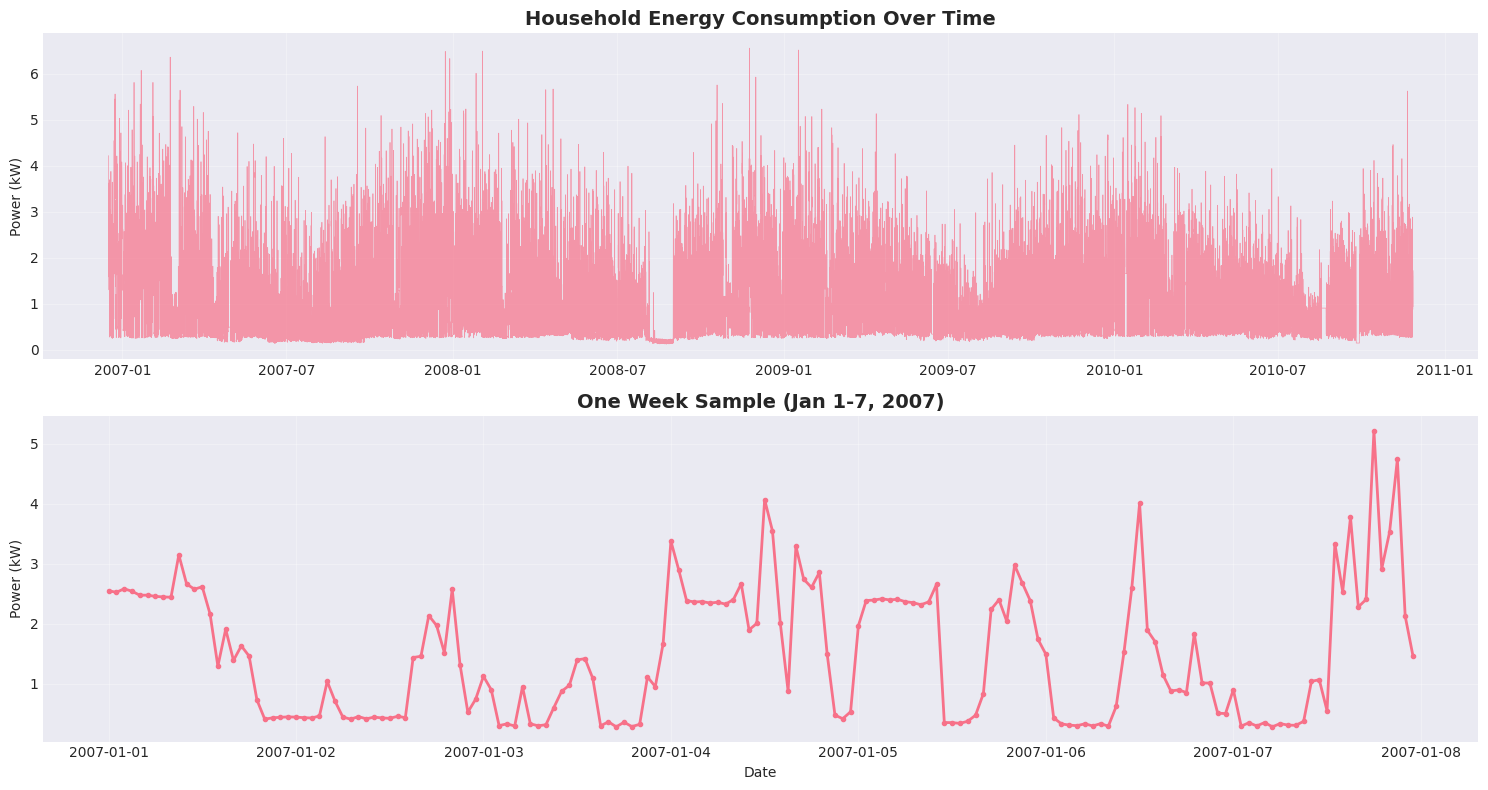

Average consumption: 1.09 kW
Peak consumption: 6.56 kW
Minimum consumption: 0.12 kW


In [10]:
# Visualize the cleaned data
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Plot 1: Full time series
axes[0].plot(df_hourly.index, df_hourly['Global_active_power'], linewidth=0.5, alpha=0.7)
axes[0].set_title('Household Energy Consumption Over Time', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Power (kW)')
axes[0].grid(True, alpha=0.3)

# Plot 2: One week sample
one_week = df_hourly['2007-01-01':'2007-01-07']
axes[1].plot(one_week.index, one_week['Global_active_power'], linewidth=2, marker='o', markersize=3)
axes[1].set_title('One Week Sample (Jan 1-7, 2007)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Power (kW)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Average consumption: {df_hourly['Global_active_power'].mean():.2f} kW")
print(f"Peak consumption: {df_hourly['Global_active_power'].max():.2f} kW")
print(f"Minimum consumption: {df_hourly['Global_active_power'].min():.2f} kW")

### Pattern Analysis

Let's explore how energy consumption varies by hour, day, and month.

**Cell Purpose:** Analyze and visualize consumption patterns across temporal dimensions.
This cell extracts temporal features (hour, day_of_week, month, season) from the datetime index and creates a 2×2 grid of bar charts showing average consumption by each dimension. It uses Pandas' `.groupby()` aggregation to compute mean power for each time unit, revealing daily cycles, weekly patterns, monthly trends, and seasonal variations. The visualizations expose peak consumption periods and low-demand times. Statistical summaries identify the specific hour, day, and season with highest usage. This exploratory analysis informs feature engineering choices for capturing cyclical patterns.

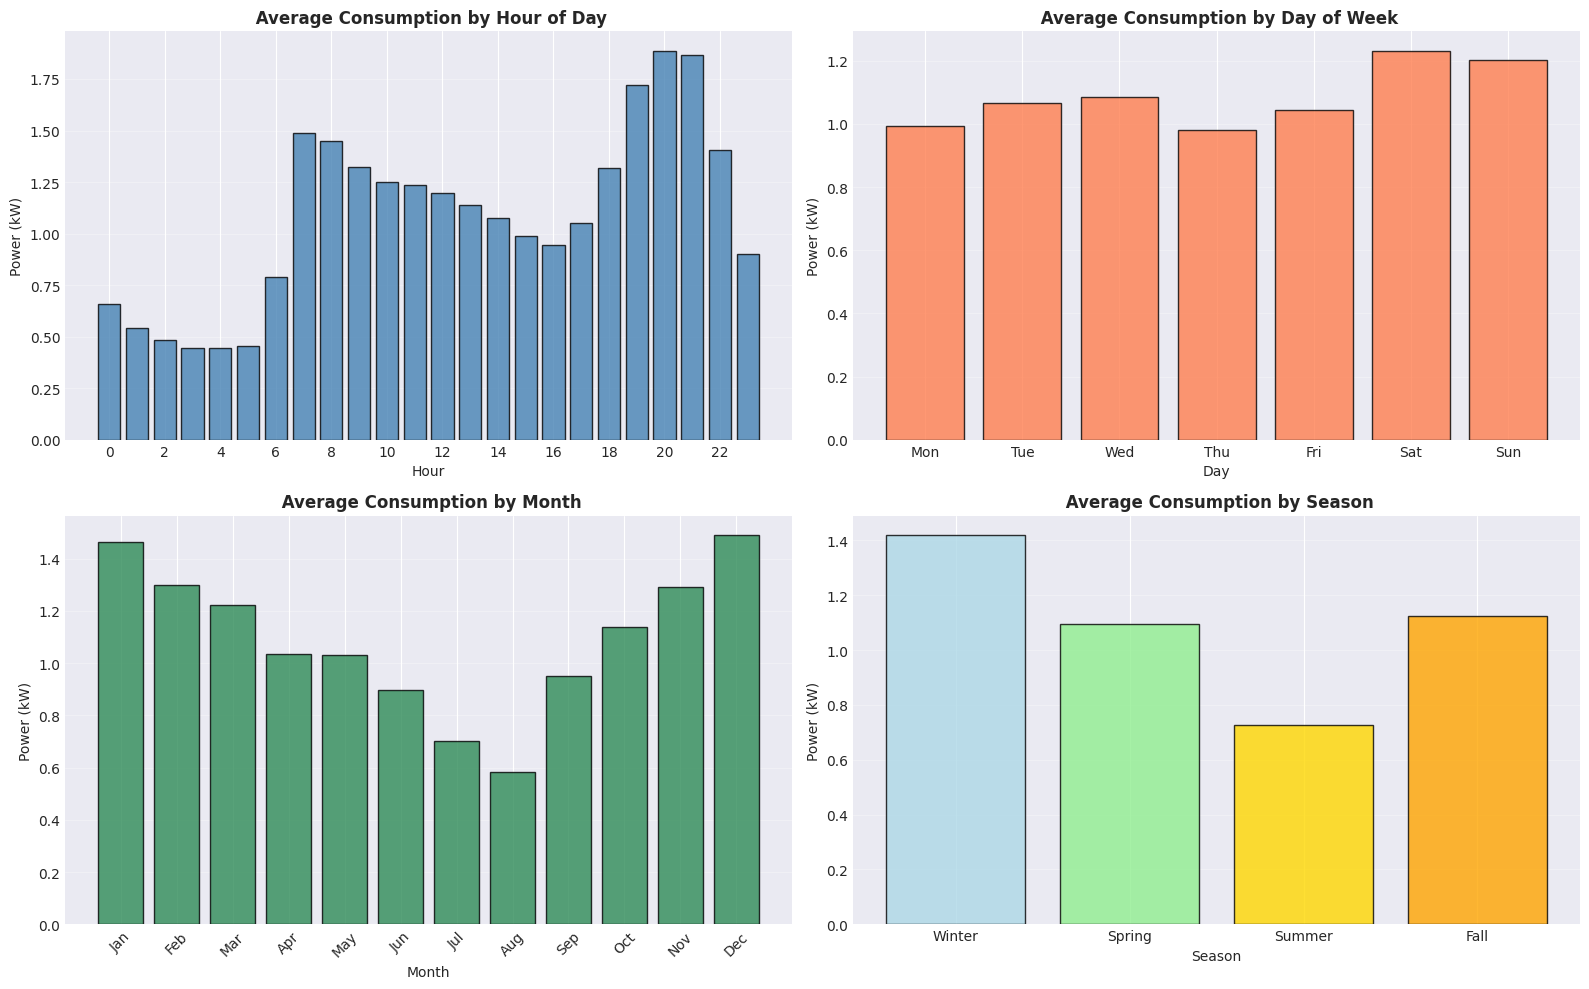


 Key Observations:
   Peak hour: 20:00 (1.89 kW)
   Lowest hour: 4:00 (0.45 kW)
   Highest consumption season: Winter (1.42 kW)


In [11]:
# Extract time features for pattern analysis
df_hourly['hour'] = df_hourly.index.hour
df_hourly['day_of_week'] = df_hourly.index.dayofweek
df_hourly['month'] = df_hourly.index.month
df_hourly['season'] = df_hourly.index.month % 12 // 3 + 1  # 1=Winter, 2=Spring, 3=Summer, 4=Fall

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Hourly pattern
hourly_avg = df_hourly.groupby('hour')['Global_active_power'].mean() #órák szerinti átlagolás
axes[0, 0].bar(hourly_avg.index, hourly_avg.values, color='steelblue', alpha=0.8, edgecolor='black')
axes[0, 0].set_title(' Average Consumption by Hour of Day', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Power (kW)')
axes[0, 0].set_xticks(range(0, 24, 2)) #0 től megyünk 24 óráig 2 órás lépésközzel
axes[0, 0].grid(True, alpha=0.3, axis='y') 

# Day of week pattern
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_avg = df_hourly.groupby('day_of_week')['Global_active_power'].mean() #Átlagot számolunk 
axes[0, 1].bar(range(7), daily_avg.values, color='coral', alpha=0.8, edgecolor='black') #range 7 = days of week
axes[0, 1].set_title(' Average Consumption by Day of Week', fontsize=12, fontweight='bold') 
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Power (kW)')
axes[0, 1].set_xticks(range(7)) # 7 nap van a héten
axes[0, 1].set_xticklabels(day_names)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Monthly pattern
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg = df_hourly.groupby('month')['Global_active_power'].mean() #Hónapok szerinti átlagolás
axes[1, 0].bar(monthly_avg.index, monthly_avg.values, color='seagreen', alpha=0.8, edgecolor='black')
axes[1, 0].set_title(' Average Consumption by Month', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Power (kW)')
axes[1, 0].set_xticks(range(1, 13)) #1-12 hónap
axes[1, 0].set_xticklabels(month_names, rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Seasonal pattern
season_names = ['Winter', 'Spring', 'Summer', 'Fall'] #4 évszak van
seasonal_avg = df_hourly.groupby('season')['Global_active_power'].mean() # évszakok szerint átlagolunk
colors = ['lightblue', 'lightgreen', 'gold', 'orange']
axes[1, 1].bar(range(1, 5), seasonal_avg.values, color=colors, edgecolor='black', alpha=0.8) #4 évszak feltüntetése 
axes[1, 1].set_title(' Average Consumption by Season', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Season')
axes[1, 1].set_ylabel('Power (kW)')
axes[1, 1].set_xticks(range(1, 5)) #4 évszak x tengely szerinti pozicionálása
axes[1, 1].set_xticklabels(season_names)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n Key Observations:")
print(f"   Peak hour: {hourly_avg.idxmax()}:00 ({hourly_avg.max():.2f} kW)")
print(f"   Lowest hour: {hourly_avg.idxmin()}:00 ({hourly_avg.min():.2f} kW)")
print(f"   Highest consumption season: {season_names[seasonal_avg.idxmax()-1]} ({seasonal_avg.max():.2f} kW)")

## 3. CUDA Programming 

My project leverages GPU parallelism using an NVIDIA GTX 950M graphics card rather than CPU computation, as verified by nvidia-smi. Modern GPUs contain thousands of processing cores designed for SIMD (Single Instruction Multiple Data) execution, making them ideal for operations like computing rolling statistics where the same calculation is performed independently for each time point in the dataset. I implement three CUDA kernels using Numba's just-in-time compilation framework: rolling statistics (moving averages and standard deviations across sliding windows), a custom Swish activation function for non-linear feature transformation, and feature engineering pipelines combining these operations. The CUDA workflow requires understanding GPU memory hierarchy: transferring data from CPU (host) memory to GPU (device) memory, launching kernels that process data in parallel, synchronizing to ensure all threads complete, and copying results back to CPU memory. Thread organization uses a hierarchical structure where computation is organized into thread blocks (groups of cooperating threads), with enough blocks launched to cover all data elements and each thread computing one output element.

**Cell Purpose:** Detect and configure CUDA GPU availability for parallel computation.
This cell imports Numba's CUDA module and checks if a compatible NVIDIA GPU is accessible using `cuda.is_available()`. If detected, it retrieves and prints the GPU device name (e.g., GTX 950M) to confirm hardware identity. If unavailable, it notifies that CPU fallback will be used for computations. This runtime check determines whether subsequent CUDA kernels can leverage GPU parallelism or must use NumPy alternatives. The setup establishes the computational backend for accelerated feature engineering operations.

In [ ]:
# Import CUDA libraries
from numba import cuda

print("CUDA SETUP CHECK")

if cuda.is_available():
    print(" CUDA is available!")
    gpu = cuda.get_current_device()
    print(f"   GPU: {gpu.name.decode()}")
else:
    print(" CUDA not available - will use CPU fallback")

CUDA SETUP CHECK
 CUDA is available!
   GPU: NVIDIA GeForce GTX 950M
   GPU: NVIDIA GeForce GTX 950M


### 3.1 CUDA Rolling Statistics Kernels

**Cell Purpose:** Implement GPU-accelerated rolling mean calculation using CUDA kernel.
This cell defines a CUDA kernel `roll_mean` decorated with `@cuda.jit` that computes sliding window averages in parallel across GPU threads. Each thread calculates the mean of a window ending at position `i`, handling edge cases where the window extends before index 0. The wrapper function `gpu_roll_mean` manages memory transfer (CPU→GPU), launches the kernel with appropriate block/grid dimensions (256 threads per block), synchronizes execution, and copies results back to host memory. This parallel implementation significantly accelerates rolling statistics computation compared to sequential CPU loops, essential for large time series datasets.

In [13]:
@cuda.jit
def roll_mean(x, out, w):
    i = cuda.grid(1)
    if i < out.size:
        start = i - w + 1
        if start < 0:
            start = 0
        s = 0.0
        c = 0
        for j in range(start, i + 1):
            s += x[j]
            c += 1
        out[i] = s / c


def gpu_roll_mean(x, w):
    x = x.astype(np.float64)
    d_x = cuda.to_device(x)
    d_out = cuda.device_array(x.size, np.float64)
    tpb = 256
    bpg = (x.size + tpb - 1) // tpb
    roll_mean[bpg, tpb](d_x, d_out, int(w))
    cuda.synchronize()
    return d_out.copy_to_host()

print("✅ Minimal CUDA rolling mean ready")

✅ Minimal CUDA rolling mean ready


### 3.2 CUDA Swish Activation Function

**Cell Purpose:** Implement GPU-accelerated Swish activation function using CUDA kernel.
This cell defines a CUDA kernel that applies the Swish activation function (x / (1 + e^(-x))) element-wise across an array in parallel. The Swish function, popularized in deep learning, provides smooth non-linear transformation superior to ReLU for certain tasks. Each GPU thread computes Swish for one array element independently, enabling massive parallelism. The wrapper `cuda_swish` handles data type conversion to float32, memory transfers, kernel launch configuration, and result retrieval. This non-linear feature transform can capture hour-of-day patterns more expressively than raw hour values.

In [14]:
import math

@cuda.jit
def swish_kernel(x, out):
    i = cuda.grid(1)
    if i < x.size:
        v = x[i]
        out[i] = v / (1.0 + math.exp(-v))


def cuda_swish(x):
    x = x.astype(np.float32)
    d_x = cuda.to_device(x)
    d_out = cuda.device_array(x.size, dtype=np.float32)
    tpb = 256
    bpg = (x.size + tpb - 1) // tpb
    swish_kernel[bpg, tpb](d_x, d_out)
    cuda.synchronize()
    return d_out.copy_to_host()

print("✅ Minimal CUDA Swish ready")

✅ Minimal CUDA Swish ready


### 3.3 Apply CUDA Features

**Cell Purpose:** Generate engineered features using CUDA kernels or CPU fallback.
This cell creates four features: 24-hour rolling mean of power consumption (using GPU or CPU), Swish-transformed normalized hour values, and sine/cosine cyclical encodings of hour. It measures execution time to demonstrate GPU acceleration benefits. The rolling mean captures temporal momentum, Swish adds non-linearity to hour patterns, and sin/cos encodings preserve cyclical continuity (hour 23 is close to hour 0). These engineered features improve model capacity to capture daily cycles and temporal dependencies. All features are added as new columns to `df_hourly`.

In [15]:
import time

# Simplified CUDA feature engineering
print("CUDA FEATURE ENGINEERING")
start_time = time.time()
power_data = df_hourly['Global_active_power'].values.astype(np.float64)

if cuda.is_available():
    rolling_mean_24h = gpu_roll_mean(power_data, 24)
    df_hourly['power_rolling_mean_24h'] = rolling_mean_24h
    hour_norm = (df_hourly['hour'].values - 12) / 12
    df_hourly['hour_swish'] = cuda_swish(hour_norm.astype(np.float32))
    mode = "GPU"
else:
    df_hourly['power_rolling_mean_24h'] = df_hourly['Global_active_power'].rolling(24).mean()
    hour_norm = (df_hourly['hour'].values - 12) / 12
    df_hourly['hour_swish'] = hour_norm * (1 / (1 + np.exp(-hour_norm)))
    mode = "CPU"

hours = df_hourly['hour'].values.astype(float)
angle = 2 * np.pi * hours / 24.0
df_hourly['hour_sin'] = np.sin(angle)
df_hourly['hour_cos'] = np.cos(angle)

elapsed = time.time() - start_time
print(f"Features created ({mode}) in {elapsed:.3f}s: power_rolling_mean_24h, hour_swish, hour_sin, hour_cos")

CUDA FEATURE ENGINEERING
Features created (GPU) in 0.550s: power_rolling_mean_24h, hour_swish, hour_sin, hour_cos
Features created (GPU) in 0.550s: power_rolling_mean_24h, hour_swish, hour_sin, hour_cos


**Cell Purpose:** Visualize engineered features to validate transformation quality.
This cell creates a 3-panel matplotlib figure displaying the newly created features: rolling mean overlaid on actual power (top), Swish-transformed hour values (middle), and sine/cosine cyclical encodings (bottom). The rolling mean plot shows how the 24-hour window smooths consumption fluctuations. The Swish scatter reveals the non-linear mapping from hour to activation value. The cyclical encoding plot demonstrates how sine and cosine jointly represent hour as coordinates on a circle, eliminating boundary discontinuities. These visualizations confirm feature engineering succeeded and reveal their distributional properties.

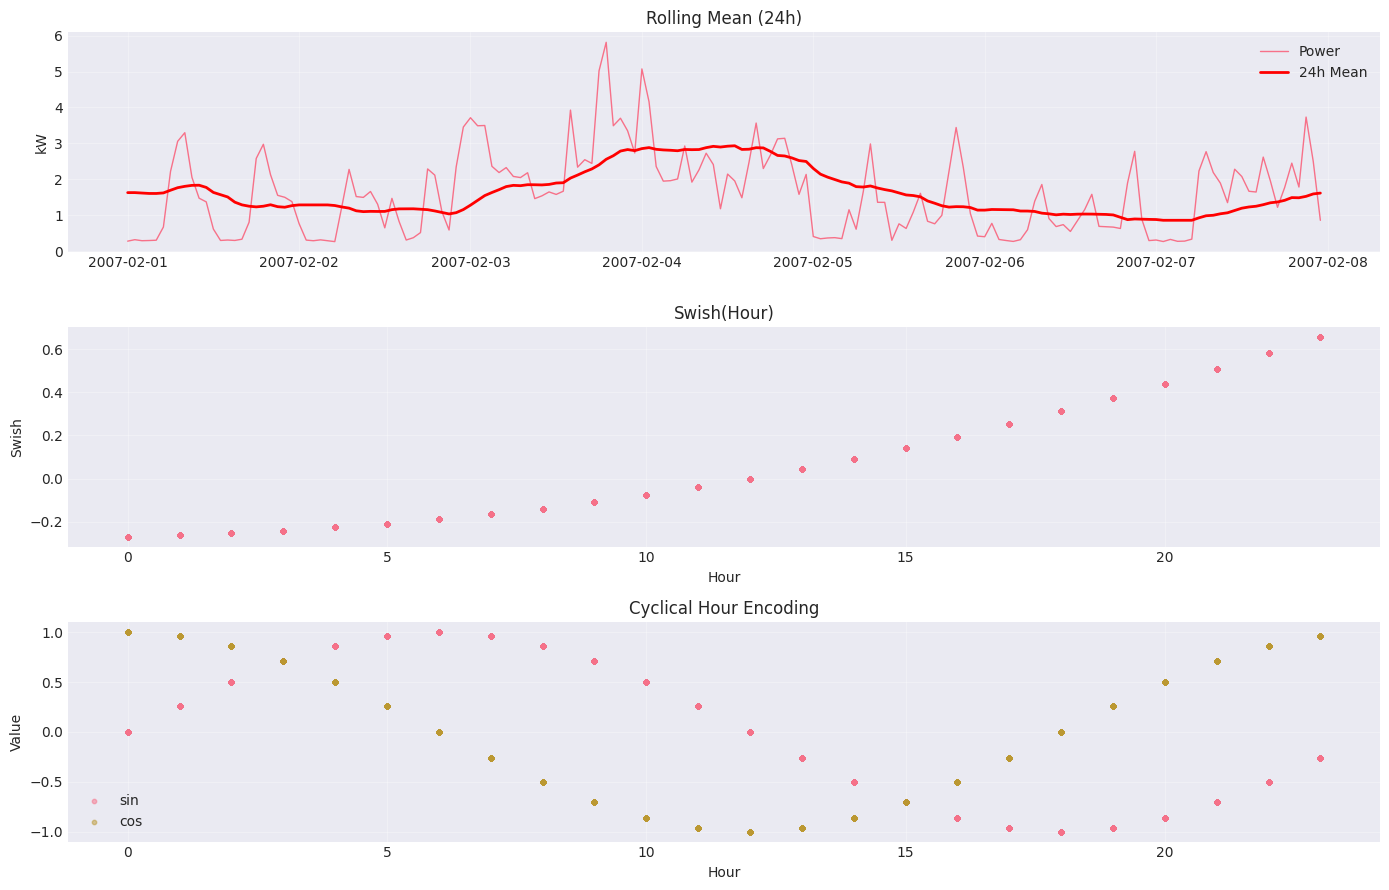

In [16]:
# Visualization of engineered features 
import matplotlib.pyplot as plt

week = df_hourly['2007-02-01':'2007-02-07']
fig, axes = plt.subplots(3, 1, figsize=(14, 9))

# Rolling mean vs actual
axes[0].plot(week.index, week['Global_active_power'], label='Power', lw=1)
axes[0].plot(week.index, week['power_rolling_mean_24h'], label='24h Mean', lw=2, color='red')
axes[0].set_title('Rolling Mean (24h)')
axes[0].set_ylabel('kW')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Swish hour feature
axes[1].scatter(df_hourly['hour'], df_hourly['hour_swish'], s=10, alpha=0.5)
axes[1].set_title('Swish(Hour)')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Swish')
axes[1].grid(alpha=0.3)

# Cyclical encoding
axes[2].scatter(df_hourly['hour'], df_hourly['hour_sin'], s=10, alpha=0.5, label='sin')
axes[2].scatter(df_hourly['hour'], df_hourly['hour_cos'], s=10, alpha=0.5, label='cos')
axes[2].set_title('Cyclical Hour Encoding')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Value')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Semi-Supervised Learning - Label Spreading

**Cell Purpose:** Demonstrate semi-supervised learning using Label Spreading algorithm.
This cell implements a minimal semi-supervised classification task where only 30% of samples have labels and the model must propagate labels to the remaining 70%. The target variable (power consumption) is discretized into 3 bins (Low/Medium/High) using quantile-based binning. LabelSpreading, a graph-based algorithm, constructs a k-nearest-neighbors graph and iteratively diffuses labels from labeled to unlabeled nodes using kernel functions. It leverages the manifold assumption that nearby points in feature space should share labels. Accuracy is measured on the originally unlabeled data to evaluate propagation quality.

In [17]:
# Minimal Semi-Supervised Learning Demo
from sklearn.semi_supervised import LabelSpreading
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

# Simple setup: use 30% labeled data to predict the rest
data = df_hourly[['Global_active_power','hour','day_of_week','month']].dropna().iloc[:5000]
X = data[['hour','day_of_week','month']].values

# Convert continuous target to 3 bins (Low/Medium/High consumption)
y = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile') \
        .fit_transform(data[['Global_active_power']]).ravel().astype(int)

# Randomly hide 70% labels (simulate unlabeled data)
n_labeled = int(len(X) * 0.3)
rng = np.random.default_rng(42)
labeled_idx = rng.choice(len(X), n_labeled, replace=False)
y_semi = y.copy()
y_semi[~np.isin(np.arange(len(X)), labeled_idx)] = -1  # -1 = unlabeled

# Train LabelSpreading
model = LabelSpreading(kernel='knn', n_neighbors=7, alpha=0.2, max_iter=30)
model.fit(X, y_semi)

# Evaluate on originally unlabeled data
unlabeled_mask = (y_semi == -1)
accuracy = (y[unlabeled_mask] == model.transduction_[unlabeled_mask]).mean()

print(f"Semi-Supervised Label Spreading")
print(f"Total samples: {len(X)} | Labeled: {n_labeled} (30%) | Unlabeled: {unlabeled_mask.sum()} (70%)")
print(f"Accuracy on unlabeled data: {accuracy*100:.1f}%")
print(" Model successfully propagated labels to unlabeled samples")

Semi-Supervised Label Spreading
Total samples: 5000 | Labeled: 1500 (30%) | Unlabeled: 3500 (70%)
Accuracy on unlabeled data: 50.8%
 Model successfully propagated labels to unlabeled samples


## 5. Regression Models: Ridge and Gradient Boosting

Now let's predict actual power consumption values using Ridge Regression and Gradient Boosting with our CUDA-engineered features.

### 5.1 Data Preparation

**Cell Purpose:** Prepare feature matrix and target vector for regression modeling.
This cell constructs the final modeling dataset by selecting 8 features (temporal and engineered) and the target variable (Global_active_power). It performs train-test splitting with 80/20 ratio using temporal ordering (shuffle=False) to respect time series structure. StandardScaler is applied to normalize features to zero mean and unit variance, preventing features with larger magnitudes from dominating gradient-based algorithms. The scaler is fit only on training data to avoid data leakage, then transforms both sets. Standardization improves Ridge regression convergence and ensures fair feature contribution.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

print("=" * 70)
print("REGRESSION MODELS")
print("=" * 70)

feature_cols = [
    'hour', 'day_of_week', 'month', 'season',
    'power_rolling_mean_24h', 'hour_swish', 'hour_sin', 'hour_cos'
]

df_clean = df_hourly[feature_cols + ['Global_active_power']].dropna()
X = df_clean[feature_cols].values
y = df_clean['Global_active_power'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nSamples: {len(X):,}")
print(f"Features: {len(feature_cols)}")
print(f"Train: {len(X_train):,} | Test: {len(X_test):,}")
print("StandardScaler applied (X_train_scaled / X_test_scaled ready)")
print("=" * 70)

REGRESSION MODELS

Samples: 34,589
Features: 8
Train: 27,671 | Test: 6,918
StandardScaler applied (X_train_scaled / X_test_scaled ready)


### 5.2 Ridge Regression

**Cell Purpose:** Train Ridge regression model with L2 regularization and evaluate performance.
This cell implements Ridge regression, a linear model that minimizes squared error plus an L2 penalty term (alpha × sum of squared coefficients). The penalty prevents overfitting by shrinking coefficient magnitudes, especially useful when features are correlated. The model is trained on scaled features using alpha=1.0 regularization strength. Predictions are generated for both training and test sets, then evaluated using RMSE (root mean squared error, measuring average prediction error in kW) and R² (coefficient of determination, proportion of variance explained). Training time is recorded to benchmark computational efficiency.

In [19]:
import time
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

start_time = time.time()
ridge = Ridge(alpha=1, random_state=42)
ridge.fit(X_train_scaled, y_train)
ridge_time = time.time() - start_time

y_pred_ridge_train = ridge.predict(X_train_scaled)
y_pred_ridge_test = ridge.predict(X_test_scaled)

ridge_train_rmse = mean_squared_error(y_train, y_pred_ridge_train) ** 0.5
ridge_train_r2 = r2_score(y_train, y_pred_ridge_train)
ridge_test_rmse = mean_squared_error(y_test, y_pred_ridge_test) ** 0.5
ridge_test_r2 = r2_score(y_test, y_pred_ridge_test)

print(f"Ridge (scaled) Train RMSE {ridge_train_rmse:.4f} | R2 {ridge_train_r2:.4f}")
print(f"Ridge (scaled) Test  RMSE {ridge_test_rmse:.4f} | R2 {ridge_test_r2:.4f} | Time {ridge_time:.4f}s")

Ridge (scaled) Train RMSE 0.7785 | R2 0.2991
Ridge (scaled) Test  RMSE 0.6412 | R2 0.2303 | Time 0.0147s


**Cell Purpose:** Train Gradient Boosting ensemble model for non-linear regression.
This cell implements Gradient Boosting Regressor, an ensemble method that builds trees sequentially where each new tree corrects errors of the previous ensemble. It uses 200 weak learners (decision trees) with max_depth=6, learning_rate=0.1 to control step size in gradient descent. Unlike Ridge, Gradient Boosting captures non-linear relationships and feature interactions through recursive partitioning. The algorithm minimizes loss via gradient descent in function space, fitting residuals at each iteration. Performance is measured with RMSE and R² on both train/test sets, with timing recorded for comparison against Ridge.

In [20]:
import time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

start_time = time.time()
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
gb.fit(X_train, y_train)
gb_time = time.time() - start_time

y_pred_gb_train = gb.predict(X_train)
y_pred_gb_test = gb.predict(X_test)

gb_train_rmse = mean_squared_error(y_train, y_pred_gb_train) ** 0.5
gb_train_r2 = r2_score(y_train, y_pred_gb_train)
gb_test_rmse = mean_squared_error(y_test, y_pred_gb_test) ** 0.5
gb_test_r2 = r2_score(y_test, y_pred_gb_test)

print(f"GB      Train RMSE {gb_train_rmse:.4f} | R2 {gb_train_r2:.4f}")
print(f"GB      Test  RMSE {gb_test_rmse:.4f} | R2 {gb_test_r2:.4f} | Time {gb_time:.4f}s")

GB      Train RMSE 0.5649 | R2 0.6309
GB      Test  RMSE 0.5604 | R2 0.4119 | Time 12.8867s


### 5.4 Model Comparison

**Cell Purpose:** Compare model performance using RMSE-focused visualization and metrics table.
This cell generates a comprehensive comparison of Ridge and Gradient Boosting models, displaying a tabular summary of train/test RMSE, R², and training time. It identifies the best model by minimum test RMSE since RMSE directly measures prediction error in kilowatts, the interpretable unit for energy forecasting. A 2×2 scatter plot grid visualizes predicted vs. actual values for both models on train and test sets, with perfect prediction shown as red diagonal lines. Deviations from this line reveal model bias and variance. The visualization enables qualitative assessment of prediction quality and identification of systematic errors.


 MODEL COMPARISON

            Model  Train RMSE  Test RMSE  Test R²  Time (s)
            Ridge    0.778476   0.641164 0.230269  0.014672
Gradient Boosting    0.564925   0.560422 0.411928 12.886678

 Best: Gradient Boosting


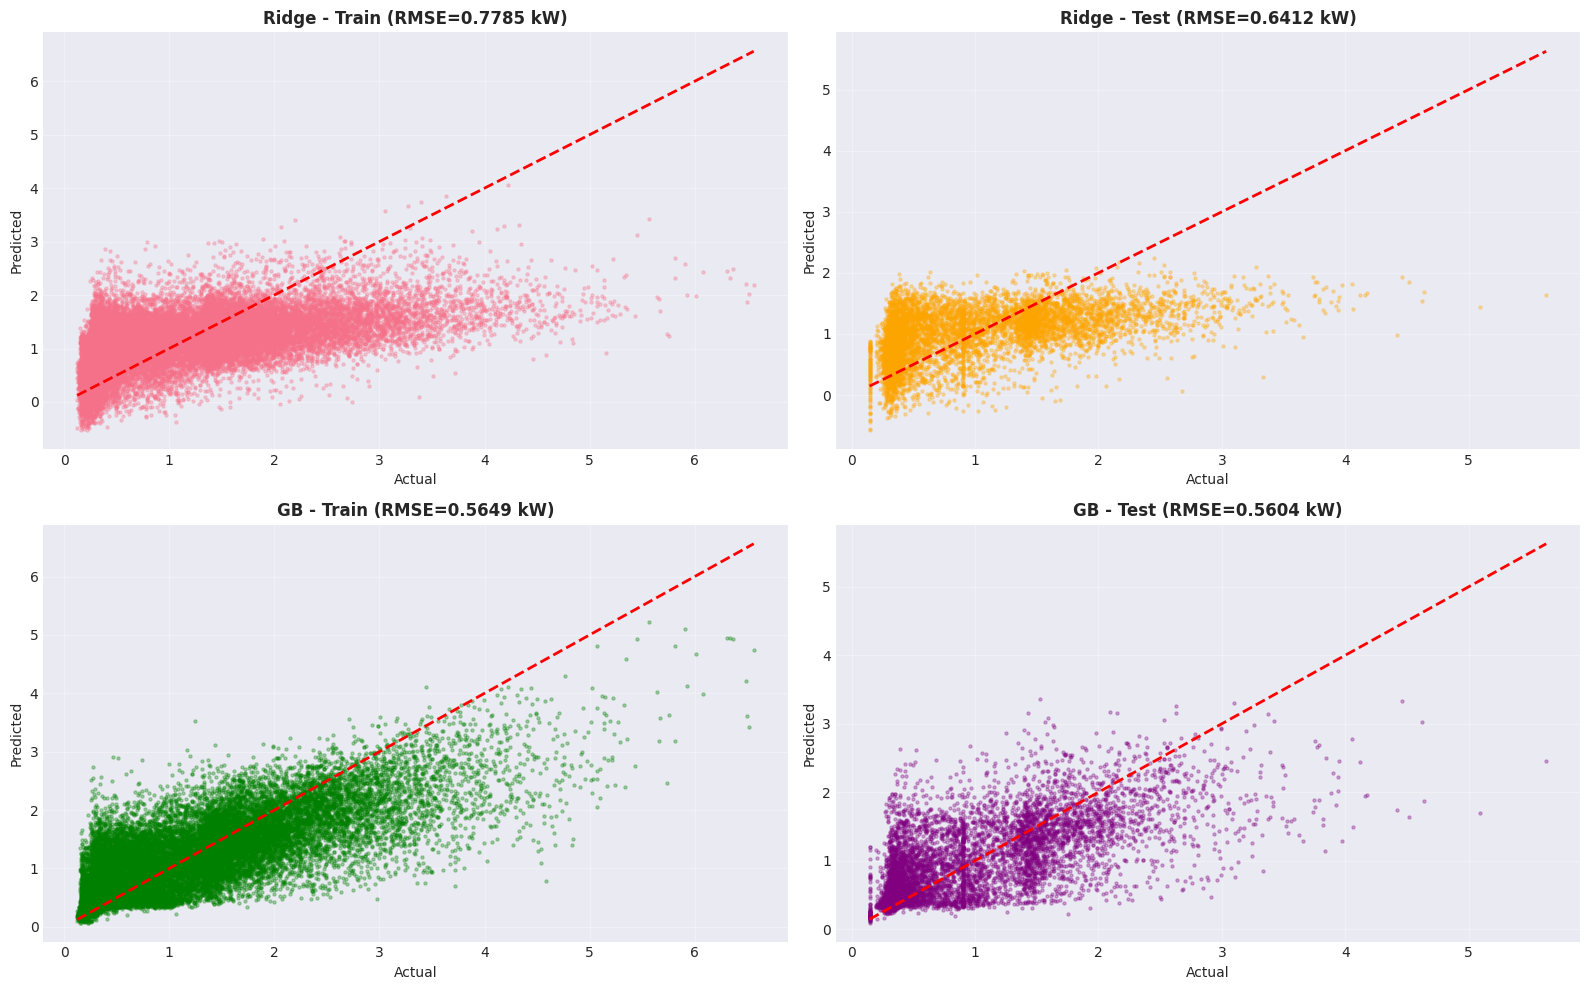


 CUDA features used in both models


In [21]:
# Model Comparison - Focus on RMSE
print("\n MODEL COMPARISON")
print("=" * 70)

comparison_df = pd.DataFrame({
    'Model': ['Ridge', 'Gradient Boosting'],
    'Train RMSE': [ridge_train_rmse, gb_train_rmse],
    'Test RMSE': [ridge_test_rmse, gb_test_rmse],
    'Test R²': [ridge_test_r2, gb_test_r2],
    'Time (s)': [ridge_time, gb_time]
})
print("\n" + comparison_df.to_string(index=False))

best_model = 'Ridge' if ridge_test_rmse < gb_test_rmse else 'Gradient Boosting'
print(f"\n Best: {best_model}")

# Visualization - Prediction vs Actual (RMSE focus)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0, 0].scatter(y_train, y_pred_ridge_train, alpha=0.3, s=5)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
                'r--', linewidth=2)
axes[0, 0].set_title(f'Ridge - Train (RMSE={ridge_train_rmse:.4f} kW)', fontweight='bold')
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(y_test, y_pred_ridge_test, alpha=0.3, s=5, color='orange')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', linewidth=2)
axes[0, 1].set_title(f'Ridge - Test (RMSE={ridge_test_rmse:.4f} kW)', fontweight='bold')
axes[0, 1].set_xlabel('Actual')
axes[0, 1].set_ylabel('Predicted')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(y_train, y_pred_gb_train, alpha=0.3, s=5, color='green')
axes[1, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
                'r--', linewidth=2)
axes[1, 0].set_title(f'GB - Train (RMSE={gb_train_rmse:.4f} kW)', fontweight='bold')
axes[1, 0].set_xlabel('Actual')
axes[1, 0].set_ylabel('Predicted')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(y_test, y_pred_gb_test, alpha=0.3, s=5, color='purple')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', linewidth=2)
axes[1, 1].set_title(f'GB - Test (RMSE={gb_test_rmse:.4f} kW)', fontweight='bold')
axes[1, 1].set_xlabel('Actual')
axes[1, 1].set_ylabel('Predicted')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n CUDA features used in both models")
print("=" * 70)